## Things to explore

- Estimate front/backyard space
- Waterfront views
- Determine density based on nearest 15 neighbors columns
- 

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [8]:
!pwd

/Users/sofiaproano/Desktop/Phase_2/Phase_2_draft


In [9]:
kc_house_df = pd.read_csv('Phase_2_data/kc_house_data.csv')

In [10]:
kc_house_df['waterfront'].fillna(0, inplace=True)

In [11]:
kc_house_df['yr_renovated'].fillna(0, inplace=True)
kc_house_df['yr_renovated'].value_counts()

0.0       20853
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64

In [12]:
def is_renovated(reno_list):
    new_list = []
    for x in reno_list:
        if x == 0:
            new_list.append(False)
        else:
            new_list.append(True)
    return new_list

In [13]:
kc_house_df['is_renovated'] = is_renovated(kc_house_df['yr_renovated'])

In [14]:
kc_house_df['view'].fillna(0, inplace=True)

In [15]:
def become_date(date_list):
    new_list=[]
    for x in date_list:
        new_list.append(datetime.strptime(x, '%m/%d/%Y'))
    return new_list

In [16]:
kc_house_df['date'] = become_date(kc_house_df['date'])
kc_house_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,is_renovated
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,False
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,True
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062,False
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,False
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,False


In [17]:
def trans_int(string_list):
    new_list = []
    for x in string_list:
        if type(x) == str:
            new_list.append(x)
        else:
            new_list.append(int(float(x)))
    return new_list

In [18]:
kc_house_df['sqft_basement'] = trans_int(kc_house_df['sqft_basement'])
kc_house_df['yr_renovated'] = trans_int(kc_house_df['yr_renovated'])
kc_house_df['waterfront'] = trans_int(kc_house_df['waterfront'])
kc_house_df['view'] = trans_int(kc_house_df['view'])
kc_house_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,is_renovated
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,1180,0.0,1955,0,98178,47.5112,-122.257,1340,5650,False
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,2170,400.0,1951,1991,98125,47.7210,-122.319,1690,7639,True
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,770,0.0,1933,0,98028,47.7379,-122.233,2720,8062,False
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,1050,910.0,1965,0,98136,47.5208,-122.393,1360,5000,False
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,1680,0.0,1987,0,98074,47.6168,-122.045,1800,7503,False


In [19]:
total = 0
for x in kc_house_df['sqft_basement']:
    if type(x) == str:
        continue
    else:
        total += x
mean_sqft_basement = round(total/(len(kc_house_df['sqft_basement']) - 454))
mean_sqft_basement

0

In [20]:
kc_house_df['sqft_basement'].replace(to_replace = '?', value = mean_sqft_basement, inplace = True)

In [21]:
kc_house_df_new = kc_house_df

In [22]:
kc_house_df_new.corr().price

id              -0.016772
price            1.000000
bedrooms         0.308787
bathrooms        0.525906
sqft_living      0.701917
sqft_lot         0.089876
floors           0.256804
waterfront       0.264306
view             0.393497
condition        0.036056
grade            0.667951
sqft_above       0.605368
yr_built         0.053953
yr_renovated     0.117855
zipcode         -0.053402
lat              0.306692
long             0.022036
sqft_living15    0.585241
sqft_lot15       0.082845
is_renovated     0.117543
Name: price, dtype: float64

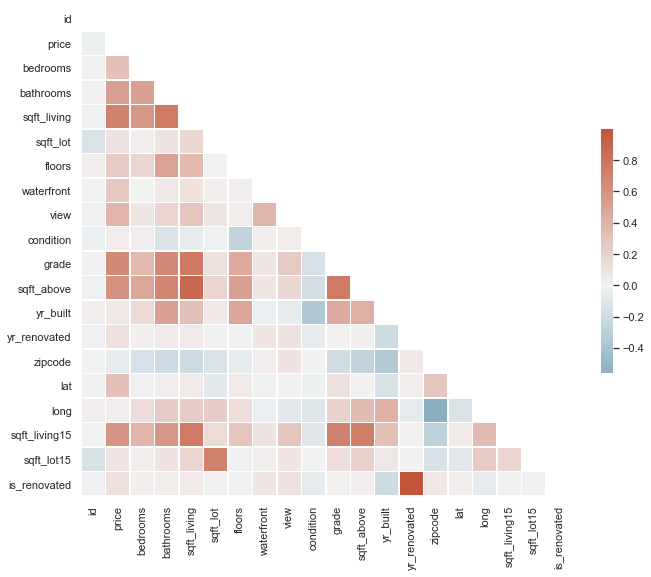

In [23]:
sns.set_theme(style="white")
corr = kc_house_df_new.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});